In [68]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
def generate_constant(m, n):
    # 平均0, 分散1の正規分布にしたがって行列を生成
    A = np.random.randn(m, n)
    # Aのランクがnになる <=> Aの各列ベクトルが1次独立であるか確認
    assert np.linalg.matrix_rank(A) == n

    # L-平滑のLを計算
    # LはAA^Tの最大固有値(Lmaxとする)以下であることを用いてLを生成
    val, vec = np.linalg.eig(np.dot(A, A.T))
    L = val[0].real
    return A, L

In [94]:
# logsumexp関数を定義
def f(x):
    sum = 0
    for a in A:
        sum += np.exp(np.dot(a.T, x) + 1)
    return np.log(sum)

# logsumexpの勾配を定義
def nabla_f(x):
    # 勾配の分母（スカラ）    
    denominator = 0
    # 勾配の分子（n次元ベクトル）
    nominator = 0
    for a in A:
        denominator += np.exp(np.dot(a.T, x) + 1)
        nominator += a * np.exp(np.dot(a.T, x) + 1)
    return nominator/denominator

In [95]:
EPS = 10**(-8)
# 最急降下法
def steepest(x0, L, f, nabla_f, fstar=None, step=10000):
    cnt = step
    x = np.ndarray((step, n))
    f_history = np.ndarray((step))
    x[0] = x0
    if fstar is None:
        f_history[0] = f(x0)
    else:
        f_history[0] = f(x0) - fstar
    for i in range(STEP):
        if i == 0:
            continue
        x[i] = x[i-1] - nabla_f(x[i-1]) / L
        if fstar is None:
            f_history[i] = f(x[i])
        else:
            f_history[i] = f(x[i]) - fstar
        if fstar is not None:
            if f_history[i] <= EPS:
                cnt = i
                break
        else:
            if np.linalg.norm(nabla_f(x[i])) <= EPS:
                cnt = i
                break
    return f_history[:cnt], cnt

# Nesterovの加速
def nesterov(x0, L, f, nabla_f, fstar=None, step=10000):
    cnt = step
    x = np.ndarray((step, n))
    y = np.ndarray((step, n))
    f_history = np.ndarray((step))
    x[0], y[0] = x0, x0
    p_lam = 0
    if fstar is None:
        f_history[0] = f(x0)
    else:
        f_history[0] = f(x0) - fstar
    for i in range(STEP):
        if i == 0:
            continue
        # 慣性項の係数gammaの計算
        lam = (1+np.sqrt(1+4*p_lam*p_lam))/2
        gamma = (p_lam-1)/lam
        p_lam = lam
        # steepestからの主な変更点
        y[i] = x[i-1] - nabla_f(x[i-1]) / L
        x[i] = y[i] + gamma * (y[i] - y[i-1])
        if fstar is None:
            f_history[i] = f(x[i])
        else:
            f_history[i] = f(x[i]) - fstar
        if fstar is not None:
            if f_history[i] <= EPS:
                cnt = i
                break
        else:
            if np.linalg.norm(nabla_f(x[i])) <= EPS:
                cnt = i
                break
    return f_history[:cnt], cnt

# (m, n) = (100, 10)

In [98]:
m,n = 100, 10
# 初期点x0を標準正規分布から生成
x0 = np.random.randn(n)
# m,nを設定しAとLを生成
A, L = generate_constant(m, n)
# まずはNesterovの加速で最小値を出す
f_history_ne, _ = nesterov(x0, L, f, nabla_f)
# 最小値を保存
fstar = f_history_ne[-1]
# 今度はf-fstarの値をプロットしたいのでもう一回ずつ実行
diff_history_gd, cnt_gd = steepest(x0, L, f, nabla_f, fstar)
print("gd iter count = {}".format(cnt_gd))
diff_history_ne, cnt_ne = nesterov(x0, L, f, nabla_f, fstar)
print("ne iter count = {}".format(cnt_ne))

gd iter count = 2518
ne iter count = 1367


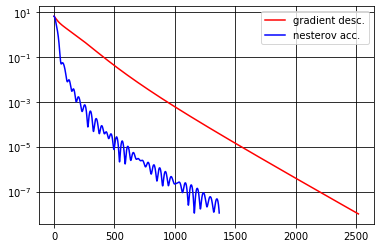

In [99]:
x_gd = np.array(range(cnt_gd))
x_ne = np.array(range(cnt_ne))
# fの値の変化をプロット, y軸を対数めもりにする
plt.yscale('log')
plt.grid(which='major',color='black',linestyle='-')
plt.plot(x_gd, diff_history_gd, color='r', label='gradient desc.')
plt.plot(x_ne, diff_history_ne, color='b', label='nesterov acc.')
plt.legend()
plt.show()

# (m, n) = (500, 50)

In [100]:
m,n = 500, 50
# 初期点x0を標準正規分布から生成
x0 = np.random.randn(n)
# m,nを設定しAとLを生成
A, L = generate_constant(m, n)
# まずはNesterovの加速で最小値を出す
f_history_ne, _ = nesterov(x0, L, f, nabla_f)
# 最小値を保存
fstar = f_history_ne[-1]
# 今度はf-fstarの値をプロットしたいのでもう一回ずつ実行
diff_history_gd, cnt_gd = steepest(x0, L, f, nabla_f, fstar)
print("gd iter count = {}".format(cnt_gd))
diff_history_ne, cnt_ne = nesterov(x0, L, f, nabla_f, fstar)
print("ne iter count = {}".format(cnt_ne))

gd iter count = 10000
ne iter count = 7541


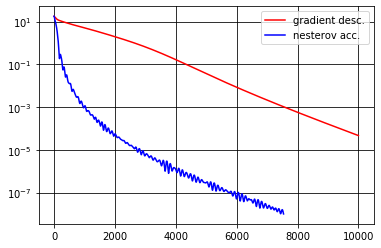

In [101]:
x_gd = np.array(range(cnt_gd))
x_ne = np.array(range(cnt_ne))
# fの値の変化をプロット, y軸を対数めもりにする
plt.yscale('log')
plt.grid(which='major',color='black',linestyle='-')
plt.plot(x_gd, diff_history_gd, color='r', label='gradient desc.')
plt.plot(x_ne, diff_history_ne, color='b', label='nesterov acc.')
plt.legend()
plt.show()